# Законы распределения дискретных случайных величин

Привести примеры дискретных случайных величин, распределенных по: 
* биномиальному закону распределения; 
* закону распределения Пуассона;
* геометрическому закону распределения;
* гипергеометрическому закону распределения.

Для каждой ДСВ составить закон распределения, найти математическое ожидание, дисперсию, среднее квадратическое отклонение и моду, отобразить многоугольник распределения.


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
np.set_printoptions(formatter={'float_kind': '{:0.4f}'.format})
pd.options.display.float_format = '{:,.4f}'.format

## Биноминальный закон распределения

**Задача:** Клумба должна быть засажена цветами определенного сорта. Вероятность всхода семян данного сорта 80%. У садовода есть только 10 семян, которые он посадит. Какова вероятность того, что взойдут не менее 9? Составить закон распределения числа взошедших семян. Также найти математическое ожидание, дисперсию, среднее квадратическое отклонение и моду, отобразить многоугольник распределения.

In [148]:
from scipy.stats import binom

**Составим закон распределения**

In [149]:
n = 10
p = 0.8
X = np.arange(0, n+1)
n
binominal_distribution = binom(n, p)
probs = binominal_distribution.pmf(X)

df = pd.DataFrame(data=probs.reshape(1, -1), columns=X, index=['p']) 
df

,0,1,2,3,4,5,6,7,8,9,10
p,0.0000,0.0000,0.0001,0.0008,0.0055,0.0264,0.0881,0.2013,0.3020,0.2684,0.1074


**Ответим на вопрос: Какова вероятность того, что взойдут не менее 9?**

In [150]:
prob_at_least_9 = probs[9] + probs[10]

print(f"Вероятность, что взойдут не менее 9 семян: {prob_at_least_9:.4f}")

Вероятность, что взойдут не менее 9 семян: 0.3758


**Найдем математическое ожидание, дисперсию, среднее квадратическое отклонение и моду**

In [98]:
mean = binom.mean(n, p)    
var = binom.var(n, p)        
std = binom.std(n, p)        
max_prob = probs.max()
mode = [int(x) for x in X if round(probs[x], 6) == round(max_prob, 6)]

print(f"Математическое ожидание: {mean:.4f}")
print(f"Дисперсия: {var:.4f}")
print(f"Среднее квадратическое отклонение: {std:.4f}")
print(f"Мода: {mode}")

Математическое ожидание: 8.0000
Дисперсия: 1.6000
Среднее квадратическое отклонение: 1.2649
Мода: [8]


**Отобразим многоугольник распределения**

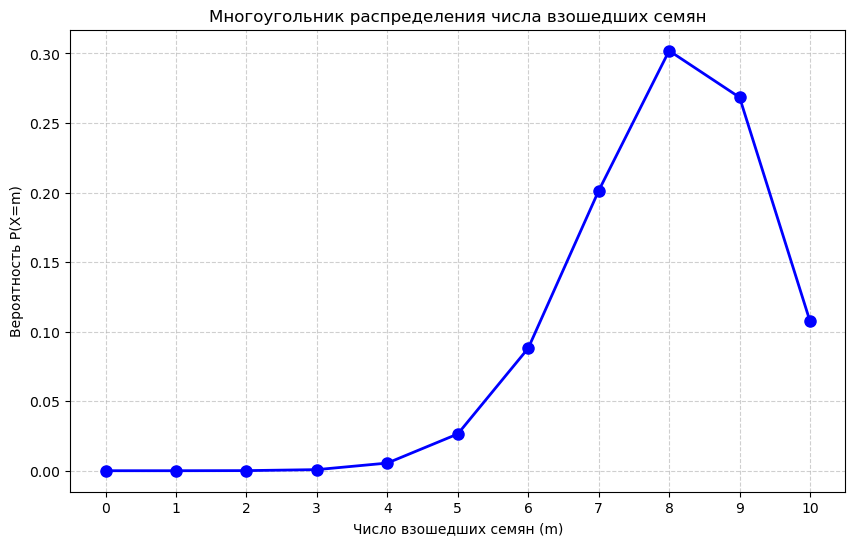

In [151]:
plt.figure(figsize=(10, 6))
plt.plot(X, probs, 'bo-', linewidth=2, markersize=8)
plt.title(f'Многоугольник распределения числа взошедших семян')
plt.xlabel('Число взошедших семян (m)')
plt.ylabel('Вероятность P(X=m)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(X)
plt.show()

## Распределение Пуассона

**Задача:** В городе Z за год в среднем угоняют 5 автомобилей. Пусть случайная величина X - число угнанных автомобилей в течении года. Какова вероятность, что в городе в следующем году угонят не более 2 авто? Составить закон распределения, найти математическое ожидание, дисперсию, среднее квадратическое отклонение и моду, отобразить многоугольник распределения. 

In [102]:
from scipy.stats import poisson 

**Составим закон распределения**

In [103]:
lmbd = 5 
X = np.arange(0, 11)

poisson_distribution = poisson(lmbd)
probs = poisson_distribution.pmf(X)

df = pd.DataFrame(data=probs.reshape(1, -1), columns=X, index=['p']) 
df

,0,1,2,3,4,5,6,7,8,9,10
p,0.0067,0.0337,0.0842,0.1404,0.1755,0.1755,0.1462,0.1044,0.0653,0.0363,0.0181


**Ответим на вопрос: Какова вероятность, что в городе в следующем году угонят не более 2 авто?**

In [104]:
prob_at_most_2 = poisson.cdf(2, lmbd)
print(f"Вероятность, что угонят не более 2 машин: {prob_at_most_2:.4f}")

Вероятность, что угонят не более 2 машин: 0.1247


**Найдем математическое ожидание, дисперсию, среднее квадратическое отклонение и моду**

In [105]:
mean = poisson.mean(lmbd)   
var = poisson.var(lmbd)        
std = poisson.std(lmbd)        
max_prob = probs.max()
mode = [int(x) for x in X if round(probs[x], 6) == round(max_prob, 6)]

print(f"\nМатематическое ожидание M[X] = {mean:.4f}")
print(f"Дисперсия D[X] = {var:.4f}")
print(f"Среднее квадратическое отклонение σ = {std:.4f}")
print(f"Мода: {mode}")


Математическое ожидание M[X] = 5.0000
Дисперсия D[X] = 5.0000
Среднее квадратическое отклонение σ = 2.2361
Мода: [4, 5]


**Отобразим многоугольник распределения**

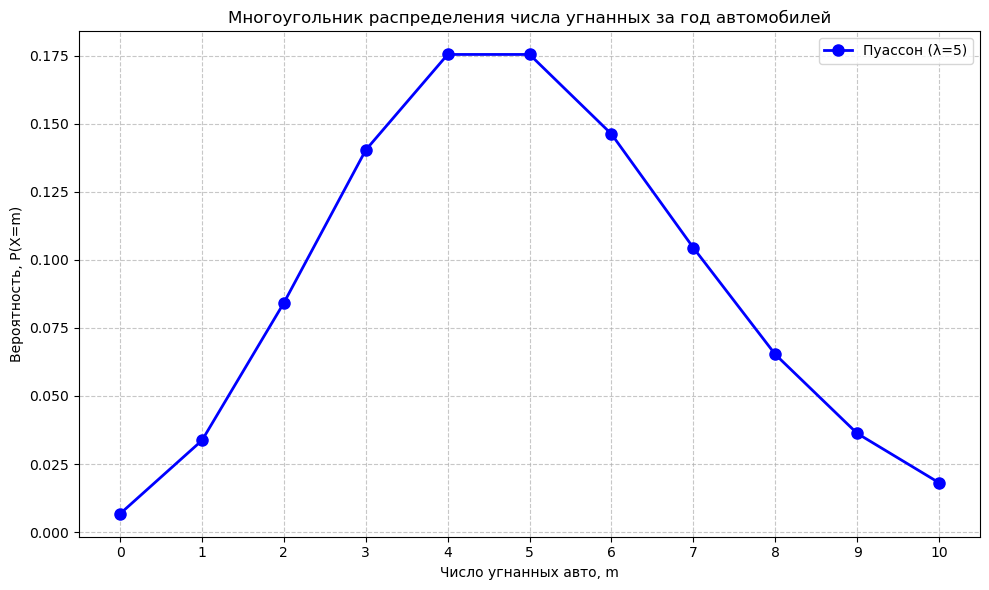

In [106]:
plt.figure(figsize=(10, 6))
plt.plot(X, probs, 'bo-', linewidth=2, markersize=8, label=f'Пуассон (λ={lmbd})')
plt.title('Многоугольник распределения числа угнанных за год автомобилей')
plt.xlabel('Число угнанных авто, m')
plt.ylabel('Вероятность, P(X=m)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(X)
plt.tight_layout()
plt.show()

## Геометрический закон распределения

**Задача:** Чтобы выиграть в настольной игре Еве нужно выкинуть на кубике 6. Так как она играет одна у неё в запасе неограниченное число бросков. Составить закон распределения числа сделанных бросков, найти математическое ожидание, дисперсию, среднее квадратическое отклонение и моду, отобразить многоугольник распределения. Найти вероятность того, что неудачных бросков будет 3.

In [125]:
from scipy.stats import geom

**Составим закон распределения**

In [126]:
p = 1/6
X = np.arange(1, 11)

geom_distribution = geom(p)
probs = geom_distribution.pmf(X)

df = pd.DataFrame(data=probs.reshape(1, -1), columns=X, index=['p']) 
df

,1,2,3,4,5,6,7,8,9,10
p,0.1667,0.1389,0.1157,0.0965,0.0804,0.0670,0.0558,0.0465,0.0388,0.0323


**Найдем вероятность того, что неудачных бросков будет 3.**

In [127]:
print(f"Вероятность, что неудачных бросков будет 3: {geom_distribution.pmf(4):.4f}")

Вероятность, что неудачных бросков будет 3: 0.0965


**Найдем математическое ожидание, дисперсию, среднее квадратическое отклонение и моду**

In [131]:
mean = geom_distribution.mean()   
var = geom_distribution.var()        
std = geom_distribution.std()        
mode = X[np.argmax(probs)]

print(f"\nМатематическое ожидание M[X] = {mean:.4f}")
print(f"Дисперсия D[X] = {var:.4f}")
print(f"Среднее квадратическое отклонение σ = {std:.4f}")
print(f"Мода: {mode}")


Математическое ожидание M[X] = 6.0000
Дисперсия D[X] = 30.0000
Среднее квадратическое отклонение σ = 5.4772
Мода: 1


**Отобразим многоугольник распределения**

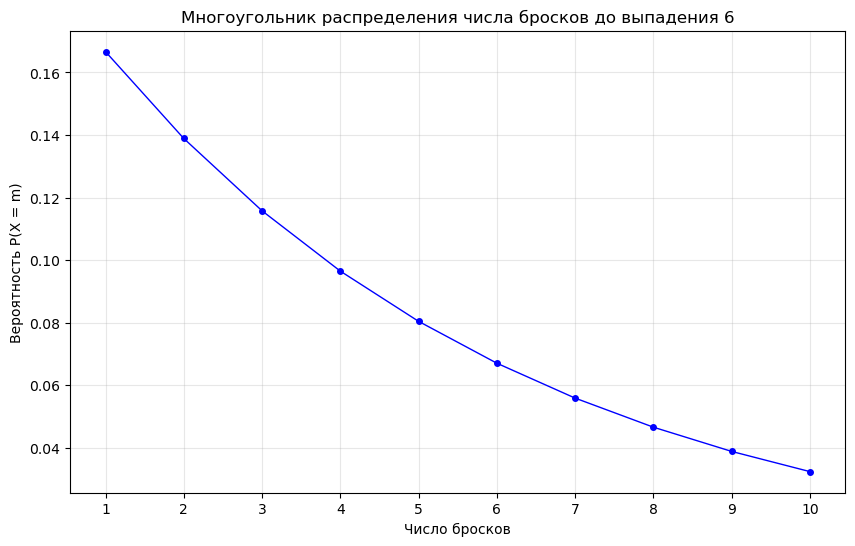

In [132]:
plt.figure(figsize=(10, 6))
plt.plot(X, probs, 'bo-', linewidth=1, markersize=4)
plt.title('Многоугольник распределения числа бросков до выпадения 6')
plt.xlabel('Число бросков')
plt.ylabel('Вероятность P(X = m)')
plt.grid(True, alpha=0.3)
plt.xticks(X)
plt.show()

## Гипергеометрический закон распределения

**Задача:** Из хорошо перемешанной колоды в 36 карт (в которой есть ровно 4 туза) наугад берут 5 карт. Случайная величина Х — количество тузов среди вынутых карт. Найдите вероятность получить ровно двух тузов. Составить закон распределения, найти математическое ожидание, дисперсию, среднее квадратическое отклонение и моду, отобразить многоугольник распределения.

In [143]:
from scipy.stats import hypergeom

**Составим закон распределения**

In [144]:
N = 36  # всего карт
M = 4   # всего тузов
n = 5   # количество вынимаемых карт

X = np.arange(0, n+1)

hypergeom_distribution = hypergeom(M=N, n=M, N=n)
probs = hypergeom_distribution.pmf(X)

df = pd.DataFrame(data=probs.reshape(1, -1), columns=X, index=['p']) 
df

,0,1,2,3,4,5
p,0.5342,0.3815,0.0789,0.0053,0.0001,0.0000


**Найдем вероятность достать из колоды двух тузов**

In [145]:
print(f"Вероятность получить ровно 2 туза: {hypergeom_distribution.pmf(2):.6f}")

Вероятность получить ровно 2 туза: 0.078941


**Найдем математическое ожидание, дисперсию, среднее квадратическое отклонение и моду**

In [146]:
mean = hypergeom_distribution.mean()   
var = hypergeom_distribution.var()        
std = hypergeom_distribution.std()        
max_prob = probs.max()
mode = [int(x) for x in X if round(probs[x], 6) == round(max_prob, 6)]

print(f"\nМатематическое ожидание M[X] = {mean:.4f}")
print(f"Дисперсия D[X] = {var:.4f}")
print(f"Среднее квадратическое отклонение σ = {std:.4f}")
print(f"Мода: {mode}")


Математическое ожидание M[X] = 0.5556
Дисперсия D[X] = 0.4374
Среднее квадратическое отклонение σ = 0.6614
Мода: [0]


**Отобразим многоугольник распределения**

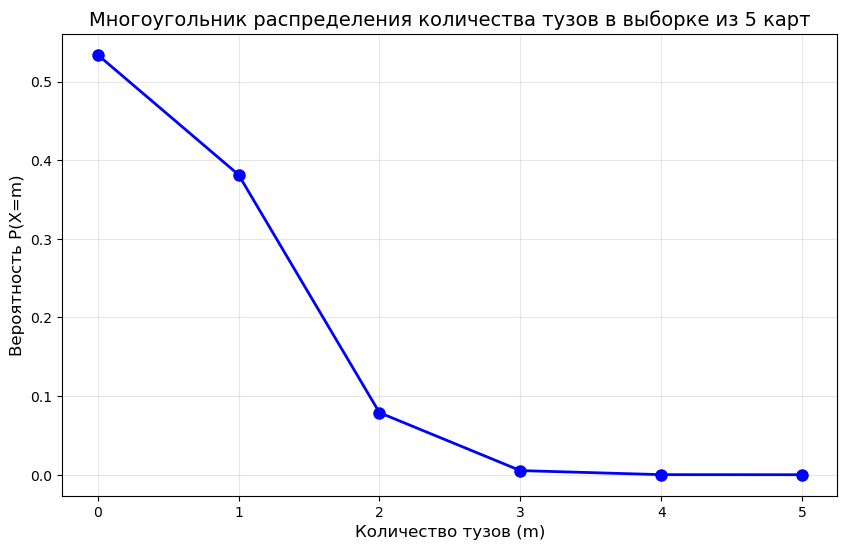

In [147]:
plt.figure(figsize=(10, 6))
plt.plot(X, probs, 'bo-', linewidth=2, markersize=8)
plt.title('Многоугольник распределения количества тузов в выборке из 5 карт', fontsize=14)
plt.xlabel('Количество тузов (m)', fontsize=12)
plt.ylabel('Вероятность P(X=m)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(X)
plt.show()